# Predicting car prices with K Nearest Neighbors

For this project, I will build a machine-learning model to predict car prices, given various characteristics of the vehicle. The dataset for this vehicle is provided by the [UCI Machine Learning Library and can be found here](https://archive.ics.uci.edu/ml/datasets/automobile).

# Overall Results

After building and testing the KNN model with various numbers of features and k-values, the best performing model is one that utilizes:

After cross-validation, the best model is one that uses:
* The top four features
    * horsepower
    * curb-weight
    * highway-mpg
    * width
* K-value of 1

The RMSE for this model is 2415.569079573549

# Methodology

## Importing and evaluating the data

For the KNN model to run effectively, I need to identify the target column and all numeric features.

In [124]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# allowing for viewing of large file
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [125]:
# correcting column names for import

cols = ['symboling',
        'normalized-losses',
        'make', 'fuel-type',
        'aspiration',
        'num-of-doors',
        'body-style', 
        'drive-wheels',
        'engine-location',
        'wheel-base',
        'length',
        'width',
        'height',
        'curb-weight',
        'engine-type', 
        'num-of-cylinders',
        'engine-size',
        'fuel-system',
        'bore',
        'stroke',
        'compression-rate',
        'horsepower',
        'peak-rpm',
        'city-mpg',
        'highway-mpg',
        'price'
       ]

# importing file
cars = pd.read_csv('imports-85.data', names=cols)

# exploring dataframe
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Numeric columns:
* symboling
* normalized-losses
* num-of-doors (needs to be converted)
* wheel-base
* length
* width
* height
* curb-weight
* engine-type
* num-of-cylinders (needs to be converted)
* engine-size
* fuel-system
* bore
* stroke
* compression-rate
* horsepower
* peak-rpm
* city-mpg
* highway-mpg

### Target column:
* price

# Data Cleaning

In this step, I will:
* Replace missing values (?) with `'np.NaN'` values
* Convert categories to numeric
* Decide what to do with missing values
* Normalize all numeric values

In [126]:
# Replacing missing ? with np.NaN
cars['normalized-losses'] = cars['normalized-losses'].replace('?', np.NaN)

In [127]:
# inspecting values in num-of-doors category
cars['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [128]:
# Replacing text numerical values with integers
cars['num-of-doors'] = cars['num-of-doors'].replace('?', np.NaN)
cars['num-of-doors'] = cars['num-of-doors'].replace('four', 4)
cars['num-of-doors'] = cars['num-of-doors'].replace('two', 2)

In [129]:
# inspecting values in num-of-cylinders category
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [130]:
# Replacing text numerical values with integers
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('four', 4)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('six', 6)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('five', 5)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('eight', 8)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('two', 2)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('three', 1)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace('twelve', 12)

In [131]:
# selecting columns with numeric/continuous values
continuous_values_cols = ['normalized-losses', 
                          'wheel-base', 
                          'length', 
                          'width', 
                          'height', 
                          'curb-weight', 
                          'bore', 
                          'stroke', 
                          'compression-rate', 
                          'horsepower', 
                          'peak-rpm', 
                          'city-mpg', 
                          'highway-mpg',
                          'num-of-doors',
                          'num-of-cylinders',
                          'price']
numeric_cars = cars[continuous_values_cols]

In [132]:
# converting all types to numeric
numeric_cars = numeric_cars.apply(pd.to_numeric, errors='coerce')

In [133]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
num-of-doors         203 non-null float64
num-of-cylinders     205 non-null int64
price                201 non-null float64
dtypes: float64(12), int64(4)
memory usage: 25.7 KB


In [134]:
# checking for remaining missing values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
num-of-doors          2
num-of-cylinders      0
price                 4
dtype: int64

In [135]:
# removing all rows with 'price' missing, since this is our target
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
num-of-doors          2
num-of-cylinders      0
price                 0
dtype: int64

In [136]:
# replace all other missing values with mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [137]:
# removing 'price' column for target
price_col = numeric_cars['price']
# normalizing all other columns
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
# replacing normalized price with real price info
numeric_cars['price'] = price_col

In [138]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,num-of-doors,num-of-cylinders,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.0,0.272727,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.0,0.272727,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.0,0.454545,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,1.0,0.272727,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,1.0,0.363636,17450.0


## Cleaning Results

We now have a cleaned dataset with only continuous, numeric values. All missing values are removed and all values have been normalized.

# Univariate Model

I will begin with a simplistic, univariate model. First, I will use the default k value and test each column to see which has the lowest error. This model will help me identify the best features to use in later multivariate models.

In [139]:
# importing scikit-learn libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [140]:
# defining function for train/test knn
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide rows in half, rounded
    last_train_row = int(len(rand_df)/2)
    
    # Splitting into train and test df
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fitting KNN model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions
    predicted_price = knn.predict(test_df[[train_col]])
    
    # Calculate/return RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse

In [141]:
# dictionary to contain rmse results
rmse_results = {}
# creating dataframe without price column
train_cols = numeric_cars.columns.drop('price')

# iterate over columns and return rmse to dictionary
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    # storing results in dictionary
    rmse_results[col] = rmse_val
    
# Convert dictionary to series to sort and view
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
num-of-cylinders     5417.206767
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
num-of-doors         9045.589027
dtype: float64

# Updating univariate model

Updating the univariate model to accept a k parameter

In [142]:
# editing knn model to add k values
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    #Shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide rows in half, rounded
    last_train_row = int(len(rand_df)/2)
    
    # Splitting into train and test df
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # expanding for k nearest neighbors
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    # Fitting KNN model
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        # Make predictions
        predicted_price = knn.predict(test_df[[train_col]])
    
        # Calculate/return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_price)
        rmse = np.sqrt(mse)
        k_rmses[i] = rmse
    return k_rmses

In [143]:
# dictionary to contain rmse results
k_rmse_results = {}
# creating dataframe without price column
train_cols = numeric_cars.columns.drop('price')

# iterate over columns and return rmse to dictionary
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    # storing results in dictionary
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

<function matplotlib.pyplot.show(*args, **kw)>

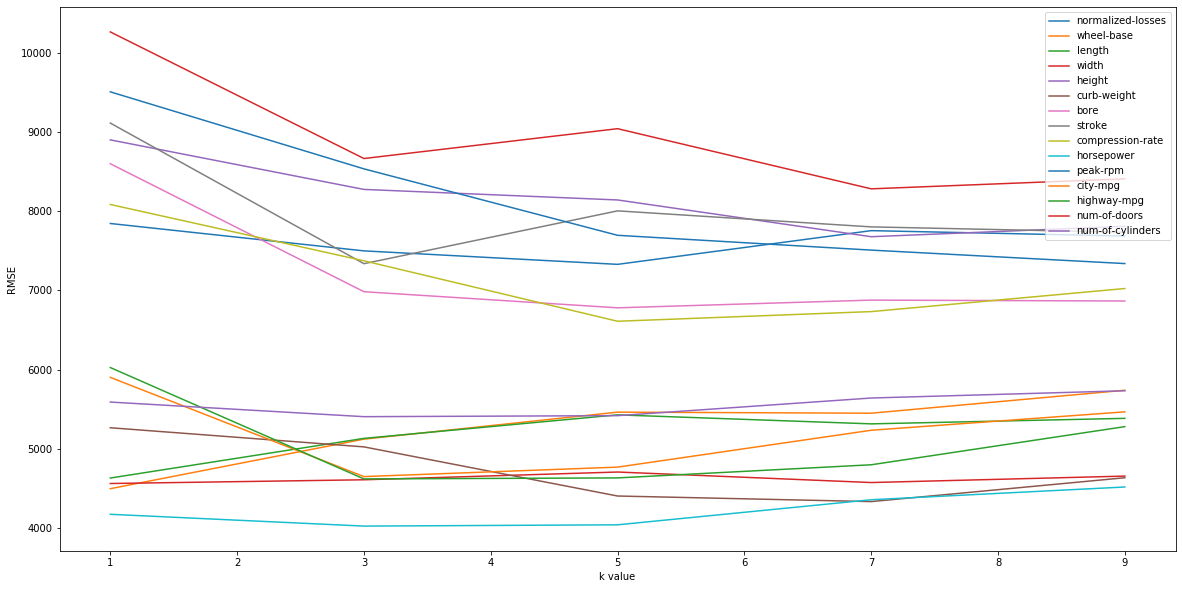

In [144]:
# Visualizing results
plt.figure(figsize=(20,10))
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(labels=train_cols, loc='best')
plt.show

# Multivariate Model

Now I will update the function to explore the best features from the univariate model, building from 2 to 5 total features.

In [145]:
# editing knn model to introduce multiple columns
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #Shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide rows in half, rounded
    last_train_row = int(len(rand_df)/2)
    
    # Splitting into train and test df
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # expanding for k nearest neighbors
    k_values = [5]
    k_rmses = {}
    
    # Fitting KNN model
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # Make predictions
        predicted_price = knn.predict(test_df[train_cols])
    
        # Calculate/return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_price)
        rmse = np.sqrt(mse)
        k_rmses[i] = rmse
    return k_rmses

# Dictionary for storing multivariate results
k_rmse_results = {}

# Separate models for each combination of features
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower','curb-weight','highway-mpg']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower','curb-weight','highway-mpg','width']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

k_rmse_results

{'two best features': {5: 3589.3132622073304},
 'three best features': {5: 3365.9110004529675},
 'four best features': {5: 3358.6915801682458},
 'five best features': {5: 3341.6024539726504}}

# Tuning hyperparameter

It seems as though the model is performing better as we add top-performing features.

So I will run the model for a range of features, from 3 to 5. And for each model, I will tune the hyperparameter of the model by using k values from 1 to 25.

In [146]:
# editing knn model to introduce multiple columns
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #Shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide rows in half, rounded
    last_train_row = int(len(rand_df)/2)
    
    # Splitting into train and test df
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # expanding for k nearest neighbors
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    # Fitting KNN model
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # Make predictions
        predicted_price = knn.predict(test_df[train_cols])
    
        # Calculate/return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_price)
        rmse = np.sqrt(mse)
        k_rmses[i] = rmse
    return k_rmses

# Dictionary for storing multivariate results
k_rmse_results = {}

# Separate models for each combination of features
three_best_features = ['horsepower','curb-weight','highway-mpg']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower','curb-weight','highway-mpg','width']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

seven_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length']
rmse_val = knn_train_test(seven_best_features, 'price', numeric_cars)
k_rmse_results['seven best features'] = rmse_val

eight_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length', 'wheel-base']
rmse_val = knn_train_test(eight_best_features, 'price', numeric_cars)
k_rmse_results['eight best features'] = rmse_val

nine_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length', 'wheel-base', 'compression-rate']
rmse_val = knn_train_test(nine_best_features, 'price', numeric_cars)
k_rmse_results['nine best features'] = rmse_val

ten_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length', 'wheel-base', 'compression-rate', 'bore']
rmse_val = knn_train_test(ten_best_features, 'price', numeric_cars)
k_rmse_results['ten best features'] = rmse_val

k_rmse_results

{'three best features': {1: 2777.396403500627,
  2: 2748.3975105936956,
  3: 2974.222577144125,
  4: 3044.7311186338325,
  5: 3365.9110004529675,
  6: 3753.3453221807013,
  7: 4002.283314211729,
  8: 4122.1233863450125,
  9: 4229.9489661319985,
  10: 4336.475078509578,
  11: 4495.725032539499,
  12: 4624.353323929217,
  13: 4621.50491988593,
  14: 4607.848304334326,
  15: 4612.372692791176,
  16: 4674.906061927671,
  17: 4725.820710082348,
  18: 4767.619185969055,
  19: 4746.534762163849,
  20: 4759.888780956884,
  21: 4765.857064287277,
  22: 4747.492587357215,
  23: 4770.00717828403,
  24: 4832.473410775114},
 'four best features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.9

<function matplotlib.pyplot.show(*args, **kw)>

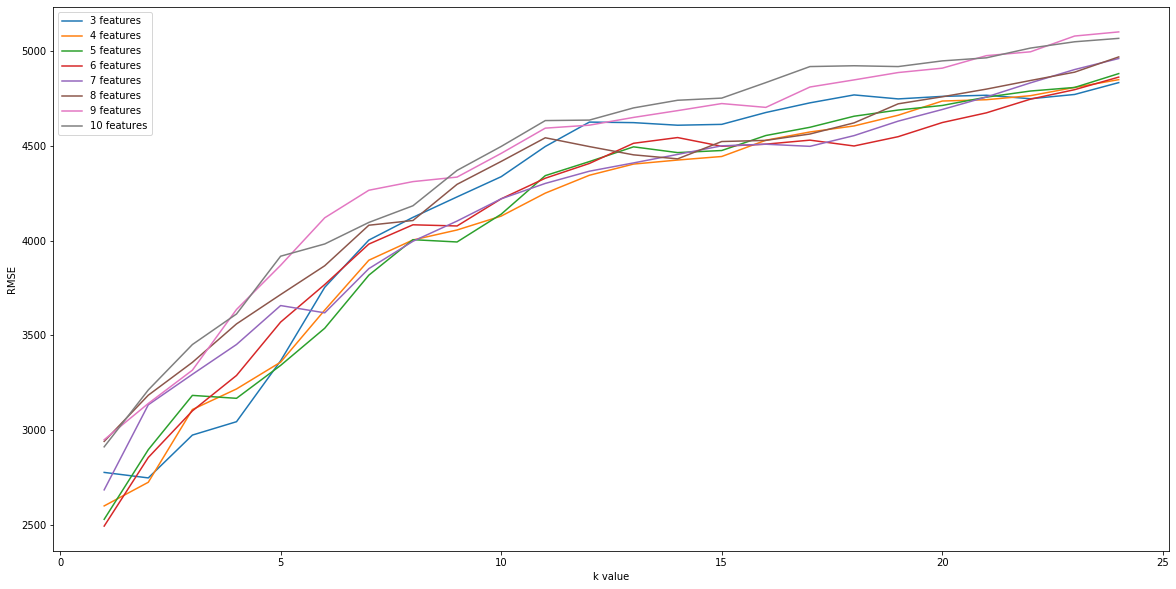

In [147]:
# Visualizing results
plt.figure(figsize=(20,10))
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(labels=['3 features', '4 features', '5 features', '6 features', '7 features', '8 features', '9 features', '10 features'], loc='best')
plt.show

# Result of multivariate model

It seems as though the best model to be used in this case is one that uses:
* The top six features
    * horsepower
    * curb-weight
    * highway-mpg
    * width
    * city-mpg
    * num-of-cylinders
* K-value of 1

The RMSE for this model is 2494.3630548709125

# Cross-validation

As a final step, I will edit the function to utilize cross-validation, rather than a simple train/test split. This should provide models with lower error.

In [149]:
# importing K fold cross validation functions
from sklearn.model_selection import cross_val_score, KFold

In [162]:
# editing knn model to introduce multiple columns
def knn_train_test(train_cols, target_col, df):
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    # expanding for k nearest neighbors
    for i in k_values:
        kf = KFold(10, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors=i)
        mses = cross_val_score(model, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        #print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
        k_rmses[i] = avg_rmse            
    return k_rmses

# Dictionary for storing multivariate results
k_rmse_results = {}

# Separate models for each combination of features
three_best_features = ['horsepower','curb-weight','highway-mpg']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower','curb-weight','highway-mpg','width']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

seven_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length']
rmse_val = knn_train_test(seven_best_features, 'price', numeric_cars)
k_rmse_results['seven best features'] = rmse_val

eight_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length', 'wheel-base']
rmse_val = knn_train_test(eight_best_features, 'price', numeric_cars)
k_rmse_results['eight best features'] = rmse_val

nine_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length', 'wheel-base', 'compression-rate']
rmse_val = knn_train_test(nine_best_features, 'price', numeric_cars)
k_rmse_results['nine best features'] = rmse_val

ten_best_features = ['horsepower','curb-weight','highway-mpg','width','city-mpg', 'num-of-cylinders', 'length', 'wheel-base', 'compression-rate', 'bore']
rmse_val = knn_train_test(ten_best_features, 'price', numeric_cars)
k_rmse_results['ten best features'] = rmse_val

k_rmse_results

{'three best features': {1: 2440.343741125566,
  2: 2505.928864729961,
  3: 2761.9273279012355,
  4: 2838.6936987530435,
  5: 2938.3705169184386,
  6: 3152.7413369931983,
  7: 3206.7398391444067,
  8: 3264.8831939112256,
  9: 3397.3320822280853,
  10: 3491.6599234833957,
  11: 3609.8959258572518,
  12: 3676.053290052162,
  13: 3747.279846907307,
  14: 3767.141126911031,
  15: 3868.8729244715287,
  16: 3889.042941040566,
  17: 3941.987149296183,
  18: 3997.134583874287,
  19: 4045.375062533449,
  20: 4104.148640733729,
  21: 4154.6042326831575,
  22: 4213.256763205005,
  23: 4245.859334432828,
  24: 4258.966275398866},
 'four best features': {1: 2415.569079573549,
  2: 2681.954882542959,
  3: 2758.2449218449706,
  4: 2866.138979466993,
  5: 2848.278751201201,
  6: 2984.8499478516633,
  7: 3150.949470433055,
  8: 3227.3728285144507,
  9: 3297.329999316523,
  10: 3369.36340090136,
  11: 3445.572038451409,
  12: 3494.691530443574,
  13: 3569.981185390067,
  14: 3660.478432439422,
  15: 370

<function matplotlib.pyplot.show(*args, **kw)>

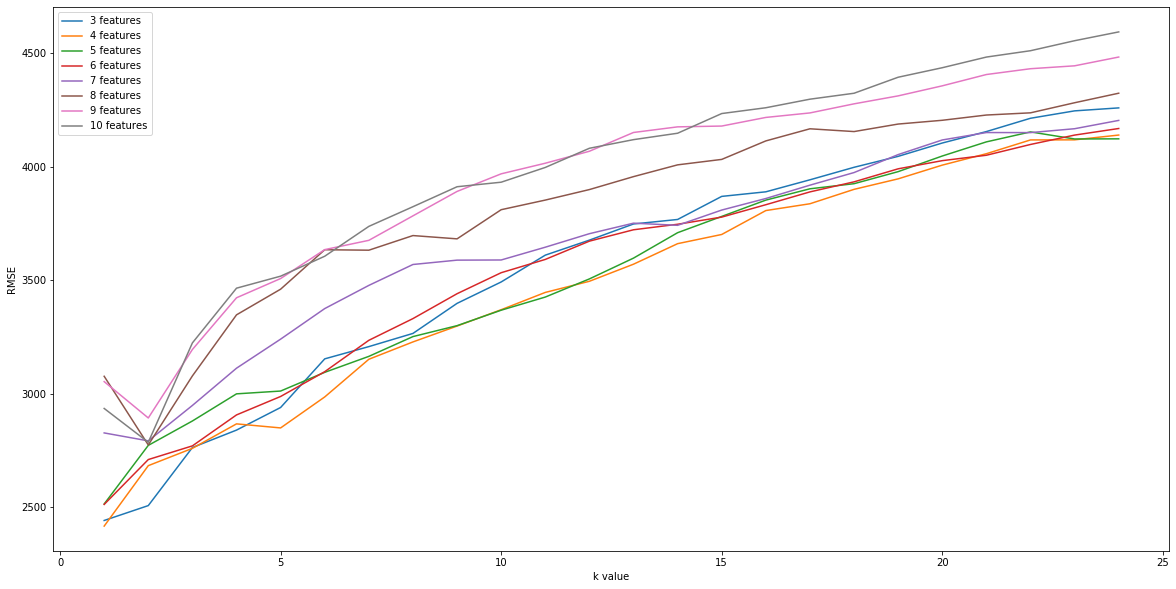

In [163]:
# Visualizing results
plt.figure(figsize=(20,10))
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(labels=['3 features', '4 features', '5 features', '6 features', '7 features', '8 features', '9 features', '10 features'], loc='best')
plt.show

# Overall Result of cross-validation model

After cross-validation, the best model is one that uses:
* The top four features
    * horsepower
    * curb-weight
    * highway-mpg
    * width
* K-value of 1

The RMSE for this model is 2415.569079573549